Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

##### Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### Import Necessary Libraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

### 1.Import/Read Data

In [3]:
heart_disease_df = pd.read_csv('heart_disease.csv')

### 2. Exploratory Data Analysis (EDA):

In [4]:
heart_disease_df.shape

(908, 13)

In [6]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [7]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
heart_disease_df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908,908,908.000000,908.000000,908,908,908.000000,908,846.000000,908,908,908.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,3,NaN,3,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,FALSE,NaN,flat,normal,NaN
freq,NaN,718,495,NaN,NaN,723,542,NaN,535,NaN,453,361,NaN
mean,53.791850,NaN,NaN,133.430617,201.484581,NaN,NaN,135.957048,NaN,0.891253,NaN,NaN,1.008811
std,9.158031,NaN,NaN,20.401608,112.097949,NaN,NaN,26.804929,NaN,1.093875,NaN,NaN,1.144436
min,29.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,0.000000
25%,47.750000,NaN,NaN,120.000000,176.750000,NaN,NaN,118.000000,NaN,0.000000,NaN,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.500000,NaN,NaN,1.000000
75%,60.000000,NaN,NaN,144.000000,270.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN,2.000000


In [10]:
heart_disease_df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

- oldpeak feature contains 62 null values

<Axes: >

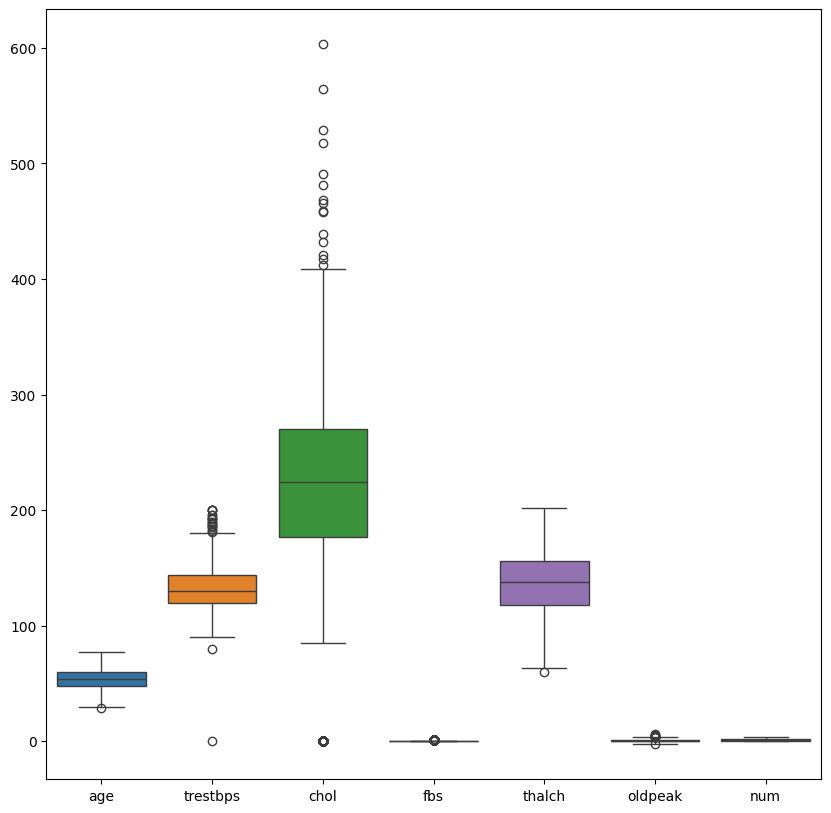

In [12]:
### check for outlires in the dataset
plt.figure(figsize=(10,10))
sns.boxplot(heart_disease_df)


In [23]:
numerical_col = heart_disease_df.select_dtypes(np.number).columns

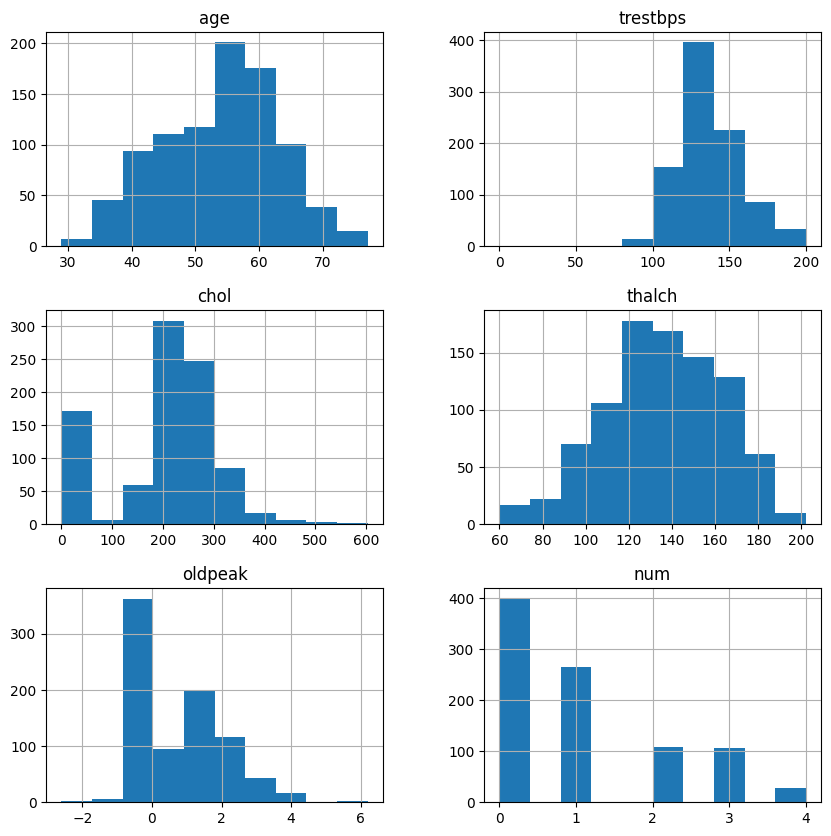

In [24]:
heart_disease_df[numerical_col].hist(figsize=(10,10))
plt.show()

From the above plot we can see that -
- For 'trestbps' data distribution is negatively sckewed and for'chol' data distribution is positively sckewed.

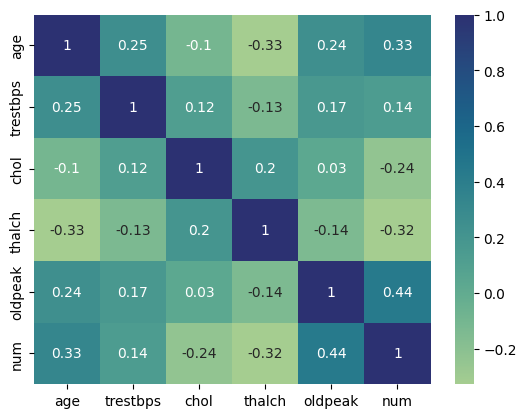

In [28]:
sns.heatmap(heart_disease_df.select_dtypes(np.number).corr(),annot=True,cmap='crest')
plt.show()

There is some coreraltion between the output feature 'num' with 'age' & 'oldpeak

IndexError: list index out of range

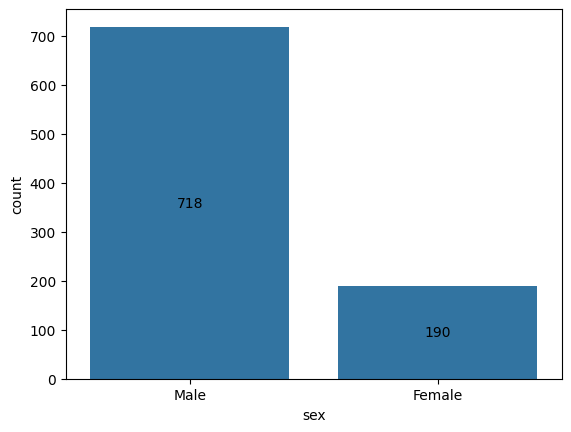

In [39]:
ax= sns.countplot(heart_disease_df,x ='sex')
ax.bar_label(ax.containers[0],label_type='center')
ax.bar_label(ax.containers[1],label_type='center')
plt.show()

### 3. Feature Engineering:

##### Missing value imputation

In [41]:
## missing value imputation for oldpeak col
heart_disease_df['oldpeak'] = heart_disease_df['oldpeak'].fillna(heart_disease_df['oldpeak'].mean())

In [42]:
heart_disease_df['oldpeak'].isna().sum()

## there are no missing values in oldpeak col after mean imputation

np.int64(0)

##### Outlire detection and handling

In [83]:
## Outlires detection

Q1 = heart_disease_df['chol'].quantile(0.25)
Q3 = heart_disease_df['chol'].quantile(0.75)
print(Q1)
print(Q3)

176.75
270.0


In [84]:
## calculate IQR
IQR = Q3 - Q1
print(IQR)

93.25


In [85]:
## define the lower limit and upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

36.875 409.875


In [89]:
heart_disease_df[heart_disease_df['chol'] < lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
152,56,Male,non-anginal,120,0,False,normal,97,FALSE,0.0,flat,reversable defect,0
176,60,Male,asymptomatic,120,0,False,normal,133,TRUE,2.0,upsloping,reversable defect,0
185,60,Male,asymptomatic,152,0,False,st-t abnormality,118,TRUE,0.0,upsloping,reversable defect,0
188,63,Male,asymptomatic,126,0,False,st-t abnormality,120,FALSE,1.5,downsloping,normal,0
189,53,Male,atypical angina,130,0,True,st-t abnormality,120,FALSE,0.7,downsloping,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,43,Male,asymptomatic,115,0,False,normal,145,TRUE,2.0,flat,reversable defect,4
895,55,Male,asymptomatic,120,0,False,st-t abnormality,92,FALSE,0.3,upsloping,reversable defect,4
901,51,Male,asymptomatic,110,0,True,normal,92,FALSE,0.0,flat,fixed defect,4
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4


In [90]:
heart_disease_df[heart_disease_df['chol'] > upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
74,65,Female,non-anginal,140,417,True,lv hypertrophy,157,FALSE,0.8,upsloping,normal,0
147,43,Female,non-anginal,150,439,False,normal,175,FALSE,0.0,upsloping,normal,0
157,67,Female,non-anginal,115,564,False,lv hypertrophy,160,FALSE,1.6,flat,reversable defect,0
187,58,Male,asymptomatic,132,458,True,normal,69,FALSE,1.0,downsloping,fixed defect,0
247,45,Male,non-anginal,135,481,False,normal,110,FALSE,0.0,flat,reversable defect,0
251,56,Male,non-anginal,130,459,False,normal,114,FALSE,0.0,upsloping,reversable defect,0
261,39,Male,atypical angina,130,432,False,normal,120,FALSE,0.0,flat,fixed defect,0
266,53,Female,atypical angina,113,468,True,normal,127,FALSE,0.0,flat,reversable defect,0
355,44,Male,asymptomatic,150,412,False,normal,170,FALSE,0.0,flat,reversable defect,0
369,45,Female,atypical angina,180,421,False,normal,180,FALSE,0.0,upsloping,fixed defect,0


In [91]:
new_hdisease_df = heart_disease_df.copy()

In [93]:
new_hdisease_df['chol'] = np.where(
    new_hdisease_df['chol'] > upper_limit,
    upper_limit,
    np.where((new_hdisease_df['chol'] < lower_limit),
    lower_limit,
    new_hdisease_df['chol']
    )
)

In [94]:
new_hdisease_df.shape

(908, 13)

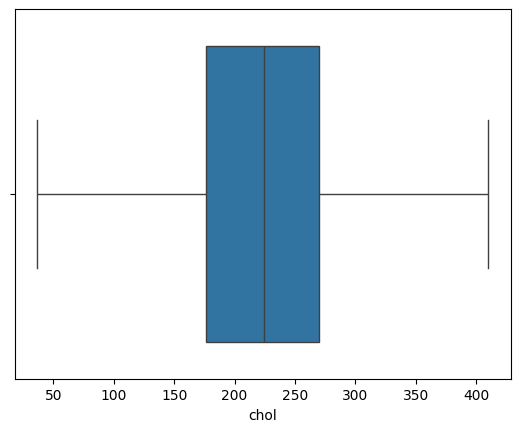

In [95]:
sns.boxplot(new_hdisease_df,x = 'chol')
plt.show()

### after replacing outlires we can see there are no outliers in the chol column

##### Encode categorical variables

In [111]:
categorical_col = new_hdisease_df.select_dtypes(object).columns
categorical_col

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [115]:
new_hdisease_df = pd.get_dummies(new_hdisease_df)

In [116]:
new_hdisease_df.shape

(908, 25)

In [117]:
new_hdisease_df.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233.0,True,150,2.3,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False
1,41,135,203.0,False,132,0.0,0,False,True,False,...,False,True,False,False,False,True,False,True,False,False
2,57,140,192.0,False,148,0.4,0,False,True,True,...,False,True,False,False,False,True,False,True,False,False
3,52,118,186.0,False,190,0.0,0,False,True,False,...,False,True,False,False,False,True,False,True,False,False
4,57,110,201.0,False,126,1.5,0,False,True,True,...,False,False,True,False,False,True,False,True,False,False


### 4. Decision Tree Classification:

In [120]:
## store dependenant and independenant variables
x = new_hdisease_df.drop('num',axis=1)
y = new_hdisease_df['num']

In [122]:
## split data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [159]:
## initialize the model
model = DecisionTreeClassifier()

In [160]:
tree_model = model.fit(x_train,y_train)

<Figure size 5000x5000 with 0 Axes>

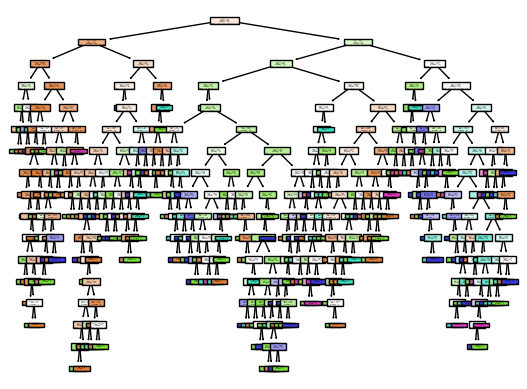

<Figure size 5000x5000 with 0 Axes>

In [161]:
## visualize decision tree
tree.plot_tree(tree_model,filled=True)
plt.figure(figsize=(50,50))

In [162]:
y_pred = tree_model.predict(x_test)

In [166]:
accuracy_score(y_test,y_pred)

0.4725274725274725

In [163]:
confusion_matrix(y_test,y_pred)

array([[53, 16, 10,  5,  1],
       [ 9, 21, 11,  5,  2],
       [ 4,  5,  5,  6,  1],
       [ 5,  5,  6,  7,  2],
       [ 0,  1,  2,  0,  0]])

In [165]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        85
           1       0.44      0.44      0.44        48
           2       0.15      0.24      0.18        21
           3       0.30      0.28      0.29        25
           4       0.00      0.00      0.00         3

    accuracy                           0.47       182
   macro avg       0.33      0.32      0.32       182
weighted avg       0.52      0.47      0.49       182



### 5. Hyperparameter Tuning:

In [167]:
### preprunning and hyperparameter tuning

In [172]:
treemodel = DecisionTreeClassifier()

In [168]:
param = {'criterion': ['gini', 'entropy', 'log_loss'],
         'splitter': ['best', 'random'] ,
         'max_depth':[1,2,3,4,5,6,7,8,9,10],
         'min_samples_split':[2,3,3,4,5],
         'max_features':['auto', 'sqrt', 'log2'],
         'max_leaf_nodes':[1,2,3,4,5,6]
         }

In [173]:
grid_model = GridSearchCV(treemodel,param_grid=param,cv=6,scoring='accuracy')

In [174]:
grid_model.fit(x_train,y_train)

s:\DataScience\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
14400 fits failed out of a total of 32400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10800 fits failed with the following error:
Traceback (most recent call last):
  File "s:\DataScience\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "s:\DataScience\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "s:\DataScience\.venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validat

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [177]:
grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'max_leaf_nodes': 6,
 'min_samples_split': 3,
 'splitter': 'random'}

In [178]:
grid_model.best_score_

np.float64(0.5730027548209367)

In [179]:
y_pred = grid_model.predict(x_test)

In [180]:
y_pred 

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0])

In [181]:
confusion_matrix(y_test,y_pred)

array([[67, 18,  0,  0,  0],
       [12, 36,  0,  0,  0],
       [ 9, 12,  0,  0,  0],
       [ 4, 21,  0,  0,  0],
       [ 1,  2,  0,  0,  0]])

In [182]:
accuracy_score(y_test,y_pred)

0.5659340659340659

In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        85
           1       0.40      0.75      0.53        48
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00         3

    accuracy                           0.57       182
   macro avg       0.22      0.31      0.26       182
weighted avg       0.44      0.57      0.49       182



s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


After analysing the performance of Decision tree before hyperparameter is less and after applying hyperparameter tuning the accuracy got increased.